# Анализ товарного ассортимента интернет-магазина товаров для дома и быта «Пока все ещё тут»

# Описание проекта

Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Вы поможете нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. **Наша задача — полноценный анализ товарного ассортимента**.

# Декомпозиция

# Заказчик:

Категорийный менеджер по развитию товарных позиций в интернет-магазине;

# Цель:

Разработать аналитические инструменты для принятия решений по дальнейшему развитию бизнеса и продаж;

# Задачи:

- Провести исследовательский анализ данных;
- Повести полноценный анализ товарного ассортимента, сегментировать товарный ассортимент;
- Сформулировать и проверить статистические гипотезы;
- Визуализировать и подготовить дашборд;

# Шаг 1. Изучение и подготовка данных

- Изучить полученные данные;
- Проверить данные на наличие пропусков и дубликатов;
- Привести данные к нужным типам;

# Шаг 2. Исследовательский анализ данных

- Посмотреть на распределения, выявить аномалии, при их наличи;
- Оценить динамику продаж по времени;
- Проанализировать продуктовый ассортимент, выявить основные категории продуктов;

# Шаг 3. Кластеризация товаров

- Провести кластеризацию, обозначить кластеры продуктов и описать признаки;

# Шаг 4. Анализ ключевых бизнес-метрик продуктового ассортимента

- Выявить сезонность продаж;
- Посчитать количество уникальных пользователей за период DAU, WAU, MAU и за сезон;
- Посчитать количество заказов за сезон и в разбивке по кластерам;
- Проанализировать динамику среднего чека во времени;
- Проанализировать динамику среднего чека по кластерам;
- Посчитать выручку за период и в разбивке по кластерам;

# Шаг 5. Статистический анализ данных

- Выявить взаоимосвязи между кластерами товаров;
- Выяснить наиболее и наименее прибыльные кластеры товаров;
- На основе сезонности популярности тех или иных сегментов товаров, спрогнозировать динамику будущих продаж;

# Шаг 6. Подготовить дашборды

- Выбрать один из наборов и создать дашборды:

Набор №1

1. Постройте диаграмму количества покупок по дням.
2. Добавьте индикатор количества покупателей.
3. Добавьте фильтр дашборда по дате совершения покупки.

Набор №2

1. Постройте диаграмму, отображающую сумму покупок по дням.
2. Постройте гистограмму, отображающую распределение заказов по сумме.
3. Добавьте фильтр дашборда по дате совершения покупки.

# Шаг 7. Подготовить презентацию

- По итогам исследования подготовить презентацию. Для создания презентации использовать любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf, прикрепив ссылку на файл в основном проекте;

# Описание данных:

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  **ecommerce_dataset.csv**:

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

# Данные:

[ecommerce_dataset.csv](https://disk.yandex.ru/d/kJwc3szk7vzv_g)

# Анализ товарного ассортимента интернет-магазина товаров для дома и быта «Пока все ещё тут»

# Шаг 1. Изучение и подготовка данных


- Изучить полученные данные;
- Проверить данные на наличие пропусков и дубликатов;
- Привести данные к нужным типам;

## Изучение данных

In [1]:
import pandas as pd
import numpy as np 
from numpy import median
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re
from pymystem3 import Mystem
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats
from scipy import stats as st
import random
# Ограничим появление предупреждений
import warnings
warnings.filterwarnings("ignore")
import base64

In [2]:
# Загрузим датафрейм и сохраним его в переменной data

data = pd.read_csv('/datasets/ecommerce_dataset.csv', sep=',')


In [3]:
# Посмотрим информацию о данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Здорово, что в данных нет пропусков - количество значений эквивалентно количеству строк.

Данные представлены в формате таблицы. В нее входят 6737 строк, 6 столбцов. 

Столбец date (данные о датах) имеет тип int64. Нам не очень подходит такой тип для работы, поэтому потребуется его изменить.


In [4]:
# Посмотрим на первые 5 строчек

data.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Сразу видно, нам необходимо преобразовать столбец с датами, прямо сейчас он находится в неудобном для дальнейшей работы виде

In [5]:
# Посмотрим на статистику
data.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


В данных есть выбросы, вернемся к ним позже

## Приведение данных к нужным типам

In [6]:
# Приведем столбец с датами к нужному виду

data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

In [7]:
# Проверим

data.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Приведем значения в столбце product к нижнему регистру

In [8]:
# Изменим регистр столбца продуктов

data['product'] = data['product'].str.lower()

In [9]:
# Проверим

data.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


In [10]:
# Переведем тип заказа в строковый тип (потребуется далее)
data['order_id'] = data['order_id'].astype('str')

In [11]:
# Добавим также столбцы для следующего этапа работы

data['day'] = data['date'].dt.weekday
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

## Проверка на наличие дубликатов и пропусков

In [12]:
# Проверим на наличие дубликатов

data.duplicated().sum()

0

In [13]:
# Проверим на наличие пропусков

data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
day            0
month          0
year           0
dtype: int64

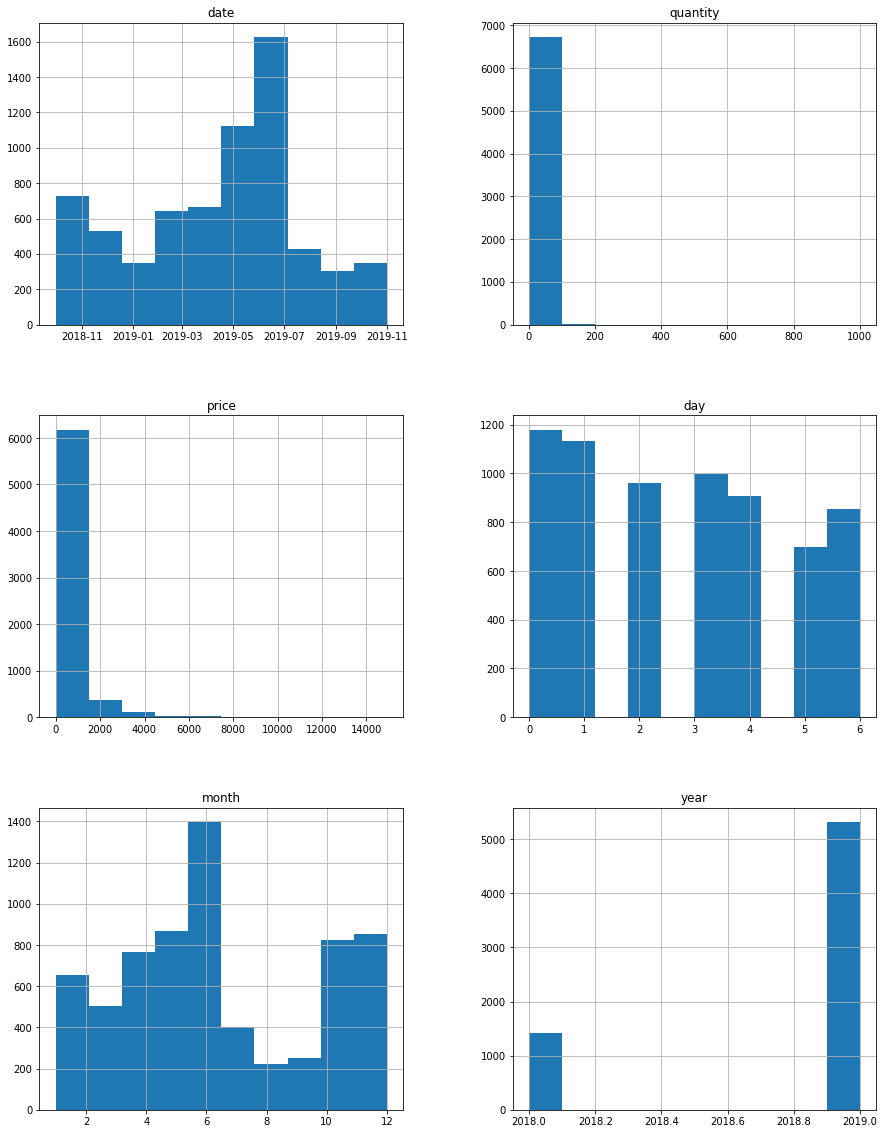

In [14]:
#Посмотрим на гистограмме, как распределены показатели

data.hist(figsize=(15, 20))
plt.show()

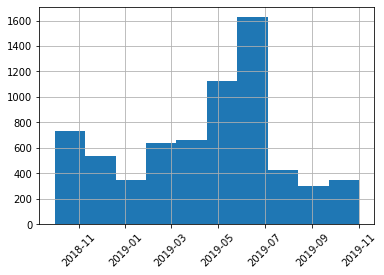

In [15]:
# Отдельно посмотрим на гистограмму дат
data['date'].hist()
plt.xticks(rotation = 45)
plt.show()

**Интересно, что с мая начинается рост продаж. Запомним это.**

In [16]:
# Посмотрим количество уникальных клиентов

len(data['customer_id'].unique())

2451

In [17]:
# Посмотрим количество уникальных заказов

len(data['order_id'].unique())

2784

По количеству клиентов и заказов есть расхождение. Поэтому посмотрим на уникальность дат и взаимосвязь уникальных клиентов и заказов

In [18]:
# Проверим у каждого заказа уникальную дату

data.groupby('order_id')['date'].nunique().sort_values(ascending=False).head()

order_id
14833    74
70960    60
69162    23
71148    16
69531    12
Name: date, dtype: int64

In [19]:
# проверим у каждого заказа уникальность клиента

data.groupby('order_id')['customer_id'].nunique().sort_values(ascending=False).head()

order_id
72845    4
71480    3
69485    3
69310    2
69833    2
Name: customer_id, dtype: int64

Получается, что заказов по количеству больше. Если заказ повторяется через определенный промежуток времени, то его номер сохраняет зачение и может быть присвоен другому клиенту. 
Необходимо поработать с нумерацией заказов.

In [20]:
# Посмотрим на количество уникальных товаров

len(data['product'].unique())

2341

In [21]:
# Еще раз применим метод describe()

data.describe()

,quantity,price,day,month,year
count,6737.000000,6737.000000,6737.000000,6737.000000,6737.000000
mean,2.501559,462.028499,2.718421,6.415764,2018.788927
std,15.266478,871.296064,2.001738,3.035431,0.408100
min,1.000000,9.000000,0.000000,1.000000,2018.000000
25%,1.000000,101.000000,1.000000,4.000000,2019.000000
50%,1.000000,135.000000,3.000000,6.000000,2019.000000
75%,1.000000,398.000000,4.000000,9.000000,2019.000000
max,1000.000000,14917.000000,6.000000,12.000000,2019.000000


У нас есть явные выбросы. Например, максимальное значение по количеству - 1000 единиц. Возможно, это оптовая закупка, но в нашем исследовании она неуместна. Более того, минимальное количество - 1, первый, второй и третий квартили тоже по 1. Среднее значение - 2,5. А отклонение 15,2. 

In [22]:
# Посмотрим на заказ на 1000 позиций

data[data['quantity'] == 1000]

,date,customer_id,order_id,product,quantity,price,day,month,year
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,1,6,2019


In [23]:
# Посмотрим на заказы более 100 позиций

data[data['quantity'] >= 100]

,date,customer_id,order_id,product,quantity,price,day,month,year
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,3,10,2018
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,3,10,2018
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,1,10,2018
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,1,10,2018
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,3,11,2018
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,4,11,2018
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"щетка для посуды *оля*, мультипласт 1807010",100,26.0,1,12,2018
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0,0,12,2018
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,щетка для мытья посуды колибри м5202 большая,100,34.0,0,1,2019
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.0,5,3,2019


Очевидно, что в данных есть оптовые заказы и их достаточно много. Впрочем, отделить оптовые заказы от обычных, но под определеннные нужды, например, ремонт, не так просто. Все-таки, среди прочих, в данных есть крепежи и ручки-скобы, которые стоят не очень дорого, но могут быть нужны в больших количествах и для ремонта.

In [24]:
np.mean(data['quantity']) + np.std(data['quantity']) * 3

48.297593808058366

In [25]:
# отфильтруем значения

data = data.query('quantity < 48').reset_index(drop=True)

In [26]:
# Проверим, результат

data[data['quantity'] < 48].tail()

,date,customer_id,order_id,product,quantity,price,day,month,year
6697,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404.0,3,10,2019
6698,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,3,10,2019
6699,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157.0,3,10,2019
6700,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0,3,10,2019
6701,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,3,10,2019


## Проработаем нумерацию заказов

In [27]:
# Используем для этого random

random.seed(42)

In [28]:
# Напишем функцию, чтобы выбирать случайный унивальный номер и отражать в столбце num

def num_order(data):
    list = []
    for i in range(len(data)):
        para = str(data.loc[i, 'date']) + data.loc[i, 'order_id']
        if para not in list:
            list.append(para)
            data.loc[i, 'num'] = str(random.randint(10000, 90000))
        else:
            data.loc[i, 'num'] = data.loc[(i-1), 'num']
            

In [29]:
# Попробуем применить функцию к данным

num_order(data)

In [30]:
# проверим количество заказов по новой нумерации

len(data['num'].unique())

3314

# Вывод

Датафрейм загружен, мы посмотрели на данные.
Они соответствуют тому, что было озвучено в задании.

У нас 6737 строк. Актуальность собранных данных это период с 1 октября 2018 года до 31 октября 2019 года. 

Пропусков нет, явных дубликатов нет.
Столбец с датой привели к нужному для работы виду, а наименования товаров к регистру. Также к строковому типу привели столбец с номерами заказов, чтобы изменить нумерацию.

Важная деталь, с мая сильно повышается количество продаж. Возможно имеет место быть сезонная активность.

Можем переходить ко второму шагу

# Шаг 2. Исследовательский анализ данных


- Оценить качество и объем данных;
- Посмотреть на распределения, выявить аномалии, при их наличи;
- Оценить динамику продаж по времени;
- Проанализировать продуктовый ассортимент, выявить основные категории продуктов;
- Сформулировать предварительные гипотезы;

# Добавим столбец со стоимостью в таблицу

In [31]:
# Cоздадим новый столбец с общей стоимостью

data['total_price'] = data['quantity'] * data['price']

# Распределим товары по категориям

In [32]:
# Нам нужно разделить наименования на отедьлные слова

data[['word1', 'word2']] = data['product'].str.split(' ', expand=True)[[0, 1]]

In [33]:
# Создадим один отдельный столбец 

data['word'] = data['word1'] + ' ' + data['word2']

In [34]:
# Уберем лишнее

data = data.drop(['word1', 'word2'], axis=1)

In [35]:
# Проведем лемматизацию

m = Mystem()
data['lemmas'] = data['word'].apply(m.lemmatize)

In [36]:
# Создадим функцию для определения категории по лемме, зададим названия для категорий

def product_category(lemmas):
    if (
        'растение' in lemmas or 'рассада' in lemmas or 'd' in lemmas or 'цветок' in lemmas
        or 'микс' in lemmas or 'герань' in lemmas or 'пеларгония' in lemmas or 'роза' in lemmas 
        or 'хризолидокарпус' in lemmas or 'циперус' in lemmas or 'шеффлер' in lemmas 
        or 'юкка' in lemmas or 'эхеверие' in lemmas or 'эвкалипт' in lemmas or 'лекарственный' in lemmas 
        or 'бегония' in lemmas or 'фиалка' in lemmas or 'бальзамин' in lemmas or 'мимоза' in lemmas
        or 'бархатцы' in lemmas or 'подсолнечник' in lemmas or 'ель' in lemmas or 'кориандр' in lemmas
        or 'адиантум' in lemmas or 'калатея' in lemmas or 'антуриум' in lemmas or 'азалия' in lemmas 
        or 'калоцефалус' in lemmas or 'цинерария' in lemmas or 'примула' in lemmas or 'нолина' in lemmas
        or 'косметь' in lemmas or 'хризантема' in lemmas or 'афеляндра' in lemmas or 'обыкновенный' in lemmas
        or 'пуансеттия' in lemmas or 'смесь' in lemmas or 'декабрист' in lemmas or 'крассула' in lemmas
        or 'тюльпан' in lemmas or 'каланхое' in lemmas or 'календула' in lemmas or 'мята' in lemmas
        or 'кофе' in lemmas or 'фикус' in lemmas or 'балконный' in lemmas or 'спатифиллум' in lemmas
        or 'ампельный' in lemmas or 'алоэ' in lemmas or 'калибрахоа' in lemmas or 'чабер' in lemmas
        or 'петуния' in lemmas or 'настурция' in lemmas or 'дендробиум' in lemmas or 'гвоздик' in lemmas
        or 'гипсофил' in lemmas or 'ранункулус' in lemmas or 'базилик' in lemmas or 'колокольчик' in lemmas
        or 'цикламен' in lemmas or 'артемизия' in lemmas or 'лаванда' in lemmas or 'зев' in lemmas
        or 'папоротник' in lemmas or 'вербейник' in lemmas or 'флокс' in lemmas or 'ясколка' in lemmas
        or 'дыня' in lemmas or 'фуксия' in lemmas or 'каллун' in lemmas or 'альбук' in lemmas
        or 'капсикум' in lemmas or 'алиссум' in lemmas or 'лапчатка' in lemmas or 'цинния' in lemmas
        or 'помидор' in lemmas or 'виноград' in lemmas or 'мускарь' in lemmas or 'крупноцветковый' in lemmas
        or 'лобелия' in lemmas or 'цитрофортунелла' in lemmas or 'аспарагус' in lemmas or 'тимьян' in lemmas
        or 'котовник' in lemmas or 'вербена' in lemmas or 'гиацинт' in lemmas or 'пиретрум' in lemmas
        or 'годеция' in lemmas or 'кореопсис' in lemmas or 'скиммия' in lemmas or 'фиттоний' in lemmas
        or 'эхинокактус' in lemmas or 'нефролепис' in lemmas or 'эшшольция' in lemmas or 'кипарисовик' in lemmas
        or 'энотера' in lemmas or 'крокус' in lemmas or 'фаленопсис' in lemmas or 'укоренять' in lemmas
        or 'табак' in lemmas or 'синнингия' in lemmas or 'гортензия' in lemmas or 'лавр' in lemmas
        or 'виола' in lemmas or 'целозия' in lemmas or 'драцена' in lemmas or 'джункус' in lemmas 
        or 'лук' in lemmas or 'баклажан' in lemmas or 'патиссон'in lemmas or 'клубника' in lemmas 
        or 'арбуз' in lemmas or 'огурец' in lemmas or 'морковь' in lemmas or 'горох' in lemmas
        or 'укроп' in lemmas or 'земляника' in lemmas or 'капуста' in lemmas or 'камнеломка' in lemmas 
        or 'петрушка' in lemmas or 'кабачок' in lemmas or 'тыква' in lemmas or 'сельдерей' in lemmas 
        or 'зверобой' in lemmas or 'георгин' in lemmas or 'мединилла' in lemmas or 'вигна' in lemmas
        or 'бадан' in lemmas or 'барвинок' in lemmas or 'трава' in lemmas or 'салат' in lemmas
        or 'клен' in lemmas or 'змееголовник' in lemmas or 'любисток' in lemmas or 'нивянник' in lemmas
        or 'импатиенс' in lemmas or 'лен' in lemmas or 'вероника' in lemmas or 'фатсия' in lemmas
        or 'физостегия' in lemmas or 'эпипремнум' in lemmas or 'лилейник' in lemmas or 'астра' in lemmas
        or 'монард' in lemmas or 'пахира' in lemmas or 'диффенбахий' in lemmas or 'шалфей' in lemmas 
        or 'смолевка' in lemmas or 'маттиола' in lemmas or 'сциндапсус' in lemmas or 'розмарин' in lemmas
        or 'амариллис' in lemmas or 'бузульник' in lemmas or 'рудбекия' in lemmas or 'солидаго' in lemmas
        or 'лаватер' in lemmas or 'анемон' in lemmas or 'лантан' in lemmas or 'буддлей' in lemmas
        or 'детерминантный' in lemmas or 'государь' in lemmas 
    ):
        return 'сад-огород'
    if (
        'щетка' in lemmas or 'таз' in lemmas or 'совок' in lemmas or 'вантуз' in lemmas 
        or 'прищепок' in lemmas or 'дозатор' in lemmas or 'ерш' in lemmas or 'биопорошок' in lemmas 
        or 'крем' in lemmas or 'перчатка' in lemmas or 'мыло' in lemmas or 'паста' in lemmas 
        or 'швабра' in lemmas or 'ведро' in lemmas or 'ножеточка' in lemmas or 'блок' in lemmas 
        or 'пена' in lemmas or 'рыбочистка' in lemmas or 'урна' in lemmas or 'насадка' in lemmas 
        or 'овощечистка' in lemmas or 'стяжка' in lemmas or 'лоток' in lemmas or 'губка' in lemmas 
        or 'средство' in lemmas or 'ролик' in lemmas or 'веник' in lemmas or 'пробка' in lemmas 
        or 'ковш' in lemmas or 'антижир' in lemmas or 'шнур' in lemmas or 'ополаскиватель' in lemmas 
        or 'корыто' in lemmas or 'картофелемялка' in lemmas or 'подставка' in lemmas 
        or 'линейка' in lemmas or 'мыльница' in lemmas or 'держатель' in lemmas 
        or 'кондиционер' in lemmas or 'кольцо' in lemmas or 'емкость' in lemmas or 'соль' in lemmas
        or 'сито' in lemmas or 'рукав' in lemmas or 'бак' in lemmas or 'концентрат' in lemmas
        or 'тряпкодержатель' in lemmas or 'окномойка' in lemmas or 'фиксатор' in lemmas or 'седум' in lemmas
        or 'антинакипин' in lemmas or 'ванна' in lemmas or 'фал' in lemmas or 'отделитель' in lemmas
        or 'отбеливатель' in lemmas or 'тряпка' in lemmas or 'молодить' in lemmas or 'концентрированный' in lemmas
    ):
        return 'хозтовары'
    if ('тарелка' in lemmas or 'вилка' in lemmas or 'ложка' in lemmas or 'нож' in lemmas 
        or 'сковорода' in lemmas or 'кружка' in lemmas or 'чайник' in lemmas or 'крышка' in lemmas 
        or 'противень' in lemmas or 'толкушка' in lemmas or 'кувшин' in lemmas 
        or 'tepмокружка' in lemmas or 'миксер' in lemmas or 'масленка' in lemmas or 'фужер' in lemmas 
        or 'кастрюля' in lemmas or 'салатник' in lemmas or 'термос' in lemmas or 'стакан' in lemmas 
        or 'овощеварка' in lemmas or 'терка' in lemmas or 'банка' in lemmas or 'чайный' in lemmas 
        or 'лопатка' in lemmas or 'измельчитель' in lemmas or 'кухонный' in lemmas or 'бокал' in lemmas 
        or 'мантоварка' in lemmas or 'скребок' in lemmas or 'кисточка' in lemmas 
        or 'эмалированный' in lemmas or 'форма' in lemmas or 'миска' in lemmas 
        or 'термостакан' in lemmas or 'столовая' in lemmas or 'термокружок' in lemmas 
        or 'блюдце' in lemmas or 'бульонница' in lemmas or 'просеиватель' in lemmas 
        or 'хлебница' in lemmas or 'маска' in lemmas or 'бальзам' in lemmas or 'орехоколка' in lemmas
        or 'скалка' in lemmas or 'венчик' in lemmas or 'овсянница' in lemmas or 'тортница' in lemmas
        or 'блюдо' in lemmas or 'стеклянный' in lemmas or 'посуда' in lemmas or 'сотейник' in lemmas
        or 'бидон' in lemmas or 'шприц' in lemmas or 'сахарница' in lemmas or 'соковарка' in lemmas
        or 'соковыжималка' in lemmas or 'половник' in lemmas
    ):
        return 'посуда'
    if ('муляж' in lemmas or 'халат' in lemmas or 'одеяло' in lemmas or 'фоторамка' in lemmas 
        or 'коврик' in lemmas or 'скатерть' in lemmas or 'ковер' in lemmas or 'искусственный' in lemmas 
        or 'штора' in lemmas or 'подкладка' in lemmas or 'простыня' in lemmas or 'салфетка' in lemmas 
        or 'декоративный' in lemmas or 'плед' in lemmas or 'полотенце' in lemmas 
        or 'наматрасник' in lemmas or 'карниз' in lemmas or 'комнатный' in lemmas 
        or 'салфетница' in lemmas or 'вкладыш' in lemmas or 'покрывало' in lemmas 
        or 'новогодний' in lemmas or 'постельный' in lemmas or 'махровый' in lemmas 
        or 'сетка' in lemmas or 'картина' in lemmas or 'подарочный' in lemmas or 'ткань' in lemmas
        or 'кашпо' in lemmas or 'наматрацник' in lemmas or 'наволочка' in lemmas or 'пододеяльник' in lemmas
        or 'ваза' in lemmas or 'корзинка' in lemmas or 'подушка' in lemmas or 'набор' in lemmas
    ):
        return 'уют'
    if ('доска' in lemmas or 'сушилка' in lemmas or 'сумка' in lemmas or 'корзина' in lemmas 
        or 'крючок' in lemmas or 'тележка' in lemmas or 'контейнер' in lemmas or 'плечики' in lemmas 
        or 'вешалка' in lemmas or 'чехол' in lemmas or 'стремянка' in lemmas or 'кофр' in lemmas 
        or 'светильник' in lemmas or 'пружина' in lemmas or 'короб' in lemmas or 'коробка' in lemmas 
        or 'ручка' in lemmas or 'ящик' in lemmas or 'котел' in lemmas or 'пакет' in lemmas 
        or 'подрукавник' in lemmas or 'петля' in lemmas or 'фен' in lemmas or 'сидение' in lemmas 
        or 'сверло' in lemmas or 'термометр' in lemmas or 'крепеж' in lemmas or 'шило' in lemmas 
        or 'комод' in lemmas or 'сварка' in lemmas or 'весы' in lemmas or 'гладильный' in lemmas 
        or 'подголовник' in lemmas or 'инструмент' in lemmas or 'этажерка' in lemmas or 'полка' in lemmas
        or 'электроштопор' in lemmas or 'экран' in lemmas or 'пылесос' in lemmas or 'штанга' in lemmas
        or 'пресс' in lemmas or 'штангенциркуль' in lemmas or 'полк' in lemmas or 'настенный' in lemmas
        or 'обувница' in lemmas or 'отжим' in lemmas or 'стеллаж' in lemmas or 'рассекатель' in lemmas
        or 'рассекатель' in lemmas or 'измерительный' in lemmas or 'шпагат' in lemmas or 'мешок' in lemmas
        or 'складной' in lemmas or 'завертка' in lemmas or 'веревка' in lemmas or 'решетка' in lemmas
        or 'покрытие' in lemmas or 'электрический' in lemmas or 'уголок' in lemmas or 'шпингалет' in lemmas
        or 'пьезозажигалка' in lemmas or 'основание' in lemmas or 'утюг' in lemmas or 'комплект' in lemmas
        or 'сметка' in lemmas or 'бензин' in lemmas
    ):
        return 'дом'
    return 'разное'

In [37]:
# Применим функцию, выделим категории

data['category'] = data['lemmas'].apply(product_category)

In [38]:
# Проверим, что получилось

data.head()

,date,customer_id,order_id,product,quantity,price,day,month,year,num,total_price,word,lemmas,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,0,10,2018,24592,142.0,комнатное растение,"[комнатный, , растение, \n]",сад-огород
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,0,10,2018,24592,194.0,комнатное растение,"[комнатный, , растение, \n]",сад-огород
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,0,10,2018,24592,112.0,радермахера d-12,"[радермахер, , d, -, 12, \n]",сад-огород
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,0,10,2018,24592,179.0,хризолидокарпус лутесценс,"[хризолидокарпус, , лутесценс, \n]",сад-огород
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,0,10,2018,24592,112.0,циперус зумула,"[циперус, , зумул, \n]",сад-огород


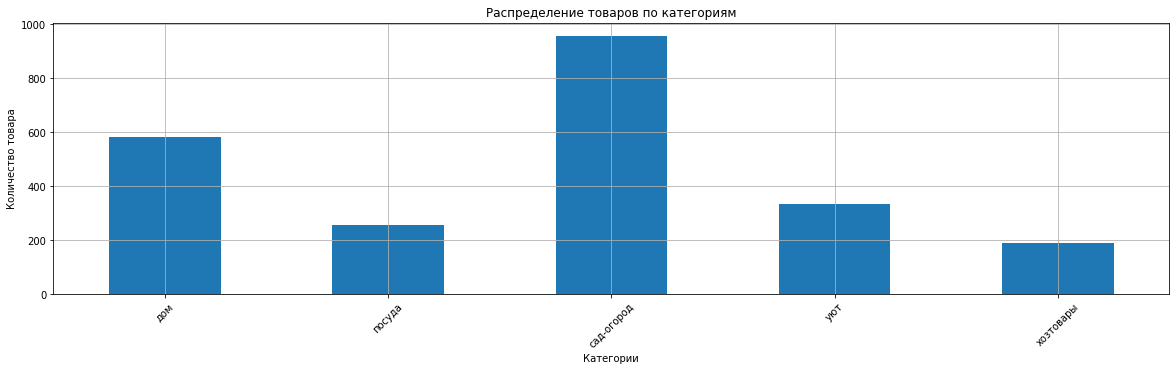

In [39]:
# Посмотрим в какой категории сколько товаров

data.groupby('category')['product'].nunique().plot(kind='bar',figsize=(20,5), grid=True)
plt.title('Распределение товаров по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество товара')
plt.xticks(rotation=45)
plt.show()

Сильно выделяется категория "сад-огород". 

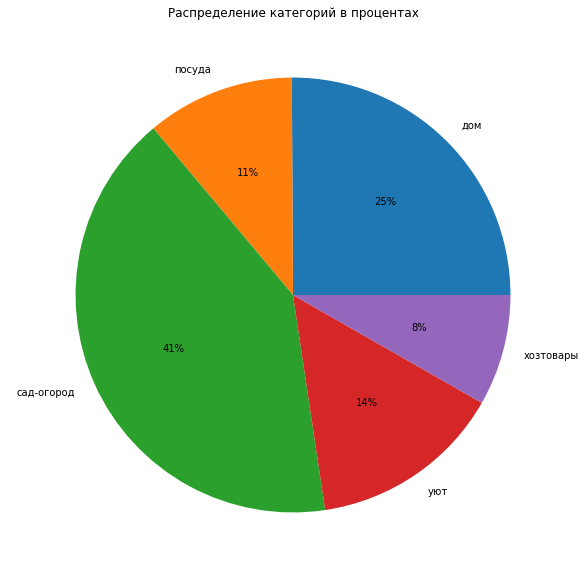

In [40]:
# Создадим диаграмму и посмотрим, в какой категории сколько товаров

gh = data.pivot_table(index='category', values='product', aggfunc='nunique')
(
    gh.pivot_table(index='category', values='product')
    .plot(kind='pie',
          figsize=(30,10),
          grid=True, 
          autopct='%.0f%%', 
          subplots=True, 
          legend=False 
          )
)    
plt.title('Распределение категорий в процентах')
plt.ylabel(' ')
plt.show()

В заказах действительно почти половина относится к категории "сад-огород". 


Text(0, 0.5, 'Выручка')

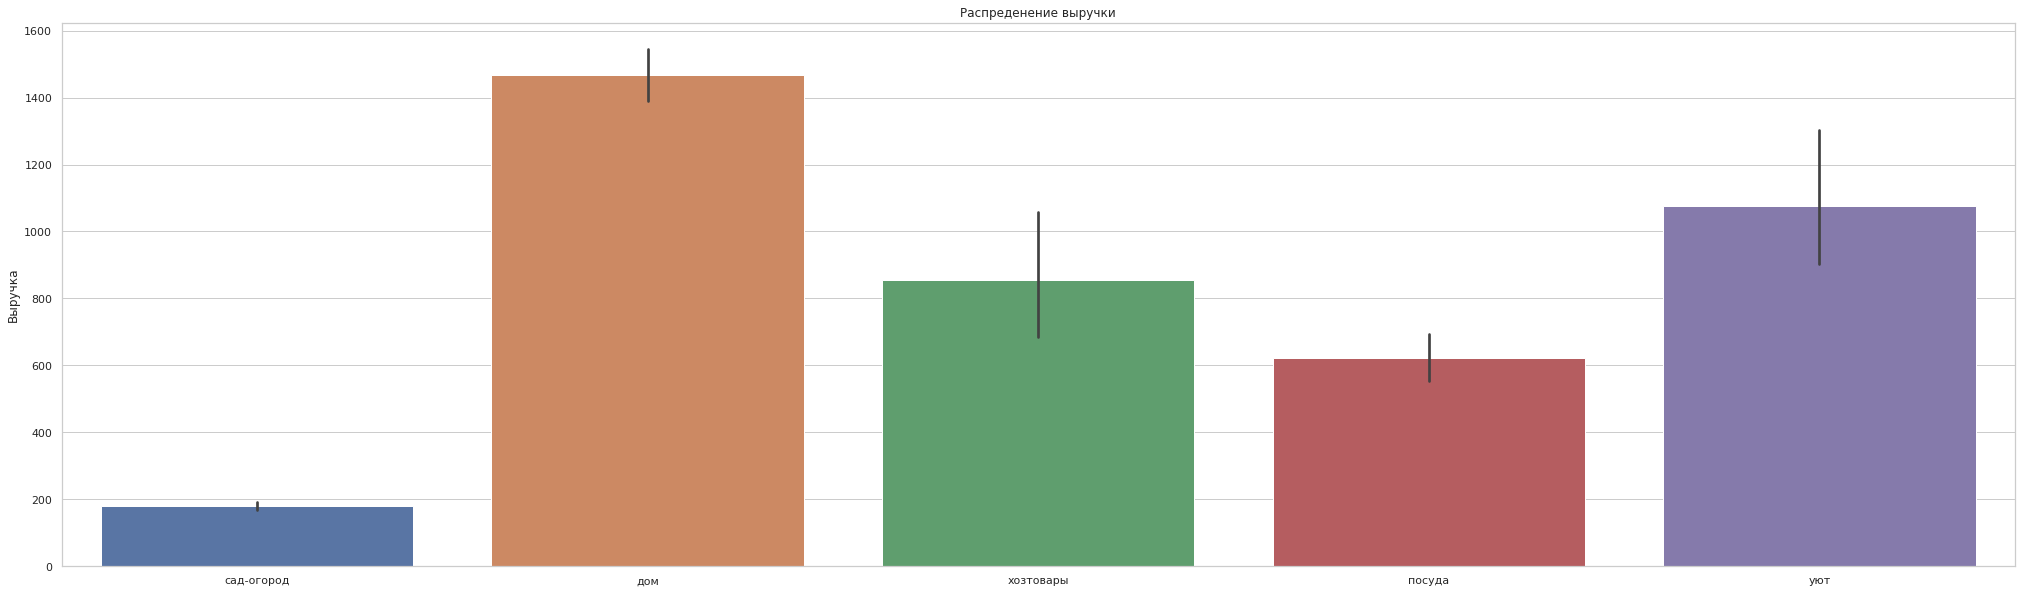

In [41]:
# Посмотрим на прибыль в разрезе категорий


plt.figure(figsize=(35, 10))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x='category', y='total_price', data=data)
ax.axes.set_title('Распреденение выручки')
ax.set_xlabel(' ')
ax.set_ylabel('Выручка')

Интересно, но ситуация разитетельно отличается. "Сад-огород" приносит наименьшую прибыль, хотя и является самой продаваемой категорией. Больше всего средств приносит "Дом".

# Построим гистограмму распределения категорий товара во времени

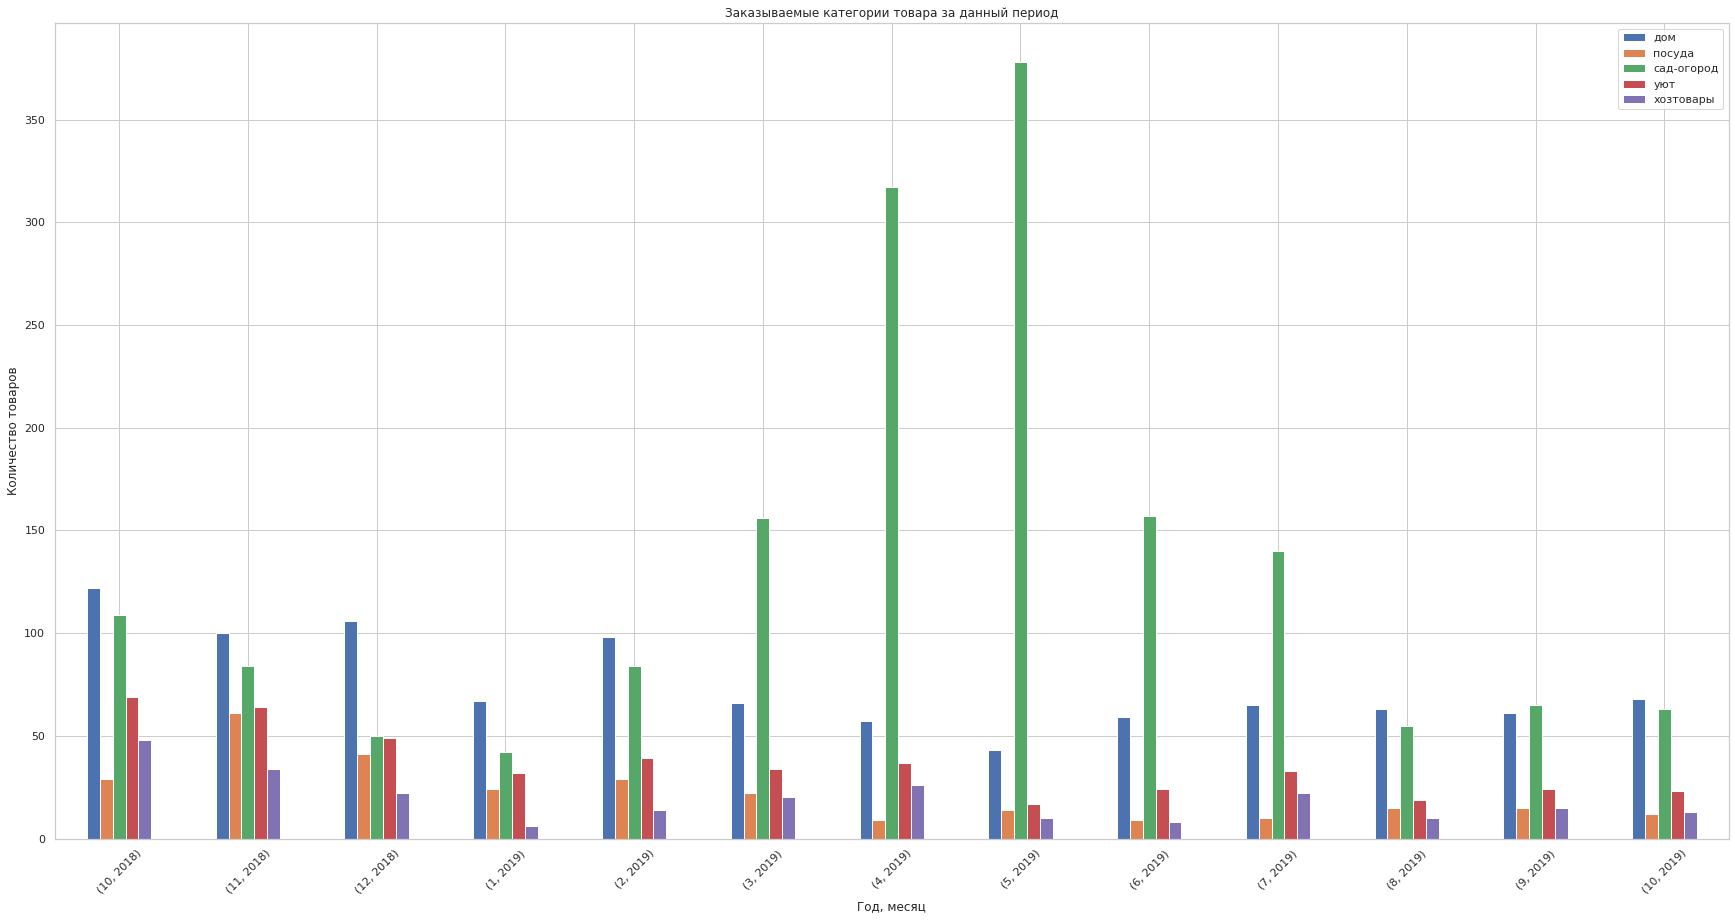

In [42]:
 # Посмотрим на распределение категорий товара по времени
    
    
(
    data.pivot_table(index=['month', 'year'], columns='category', values='product', aggfunc='nunique')
    .sort_values(by=['year', 'month'])
    .plot(kind='bar',figsize=(30,15), grid=True)
)    
plt.legend()
plt.title('Заказываемые категории товара за данный период')
plt.xlabel('Год, месяц')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)
plt.show()

Подтверждается мысль о том, что весной резко возрастают продажи в категории "сад-огород". Отмечаем сезонность. На фоне этого продажи остальных категорией проседают.

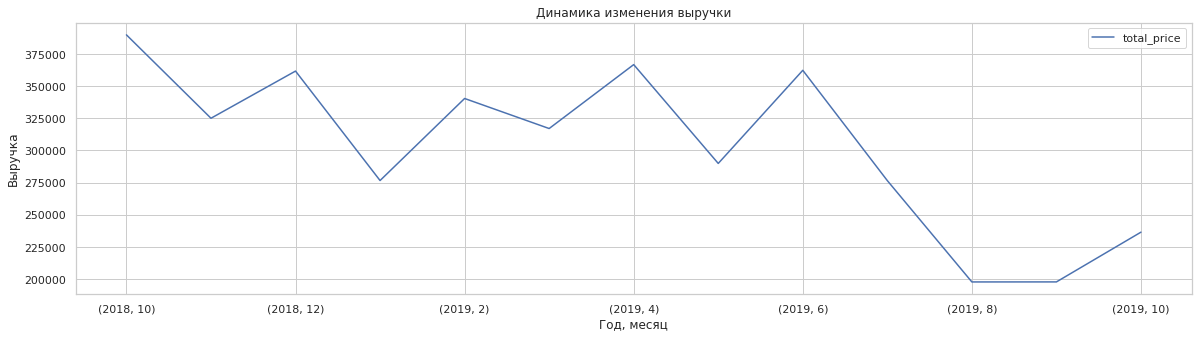

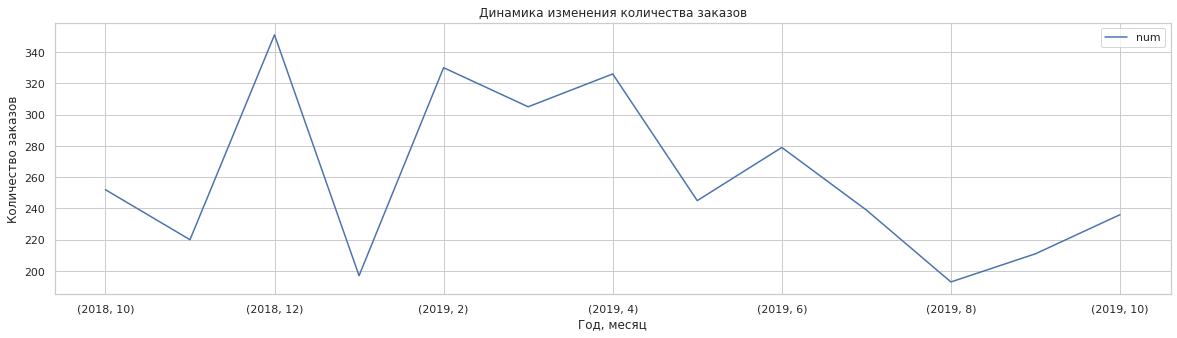

In [43]:
# Посмотрим, как изменяется выручка и количество заказов во времени

fg = (
    data.groupby(by=['year', 'month'])
    .agg({'total_price':'sum', 'num': 'nunique'})
    .sort_values(by=['year', 'month'])
)    

fg.plot(y='total_price', grid=True, figsize=(20,5))
plt.title('Динамика изменения выручки')
plt.xlabel('Год, месяц')
plt.ylabel('Выручка')
plt.show()

fg.plot(y='num', grid=True, figsize=(20,5))
plt.title('Динамика изменения количества заказов')
plt.xlabel('Год, месяц')
plt.ylabel('Количество заказов')
plt.show()

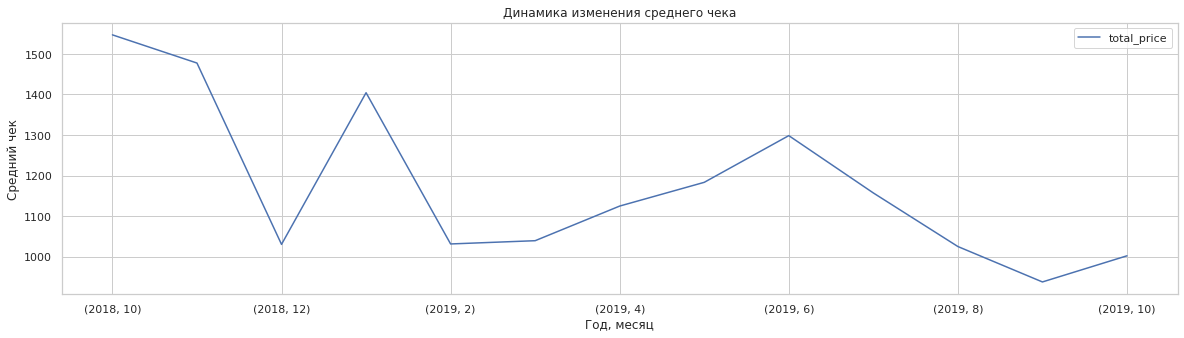

In [44]:
# Отобразим средний чек

fg = (
    data.pivot_table(index=['year', 'month', 'num'], values='total_price', aggfunc='sum')
    .reset_index() 
)    
    
(
    fg.groupby(by=['year', 'month'])
    .mean()
    .plot(figsize=(20,5), grid=True)
)    
    
plt.title('Динамика изменения среднего чека')
plt.xlabel('Год, месяц')
plt.ylabel('Средний чек')
plt.show()

На основе данных:

- Магазин продает большое количество бытовых вещей, стоимость которых остается не очень высокой.
- Среди всех товаров прослеживается вный рост спроса на товары, относящиеся к категории "сад-огород", у которых есть четко выраженная сезонность. Чаще всего ими интересуются ближе к началу летнего периода.
- Выручка магазина снижается к концу периода. Количество заказов сохраняется на том же уровне, уменьшился средний чек
- Наибольшую выручку магазину приносят товары, относящиеся к категории "дом", стоимость которых выше




Магазин специальзируется на продаже различных мелочей для дома по не высоким ценам. Среди заказываемых товаров преобладают дешевые и средней стоимости товары. Так же было определено, что магазин продает не дорогие товары сезонного характера, присущие летнему периоду. За предоставленный период выручка магазина снижается, количество заказов примерно стается на том же уровне, но средний чек заказа значительно уменьшился по сравнению с началом периода. В магазине в основном представлены товары среднего ценнового сегмента от 100 до 500, но большую выручку приносят товары премеум сегмента стоимостью от 1000.

# Шаг 3 Кластеризация

Провести кластеризацию, обозначить кластеры продуктов и описать признаки

In [45]:
# Создадим столбец с выручкой

data['revenue'] = data['price'] * data['quantity']

<AxesSubplot:>

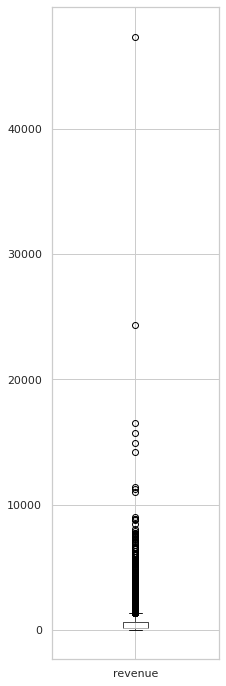

In [46]:
# Визуализируем столбец, чтобы посмотреть на выбросы

data.boxplot('revenue', figsize=(3, 12))

Выбросы есть, нам нужно их убрать, прежде чем идти дальше


In [47]:
data.drop(data[data['quantity'] == 1000].index, inplace=True)

In [48]:
data_x = data[['price', 'quantity', 'revenue']]

In [49]:
sc = StandardScaler()
x_sc = sc.fit_transform(data_x)

In [50]:
Посмотрим, как выглядит агломерация кластеров товаров

linked = linkage(x_sc, method='ward')
plt.figure(figsize=(25, 13))
plt.title('Иерархическая агломерация кластеров товаров', fontsize=14)
dendrogram(linked, orientation='top', leaf_rotation=45., leaf_font_size = 8., truncate_mode='lastp', p=100, color_threshold=80)
plt.show()

SyntaxError: invalid syntax (121170063.py, line 1)

Выделяем два кластера

In [ ]:
model_km = KMeans(n_clusters = 2, random_state = 0)
labels = model_km.fit_predict(x_sc)

In [ ]:
# Группируем

data['cluster'] = labels
data.groupby('cluster')[['quantity', 'price', 'revenue']].mean()

In [ ]:
cluster0 = data[data['cluster'] == 0]
cluster1 = data[data['cluster'] == 1]

In [ ]:
features = data[['quantity', 'price', 'revenue']]

In [ ]:
# Построим графики по количеству, стоимости и прибыли

for feature in features.columns: 
    plt.figure(figsize=(12, 8))
    sns.distplot(cluster0[feature], bins=20, color='C1', label=0)
    sns.distplot(cluster1[feature], bins=5, color='C2', label=1)
    plt.legend(title='Кластер')
    plt.xlabel('')
    plt.title(feature)
    plt.show()

Товары из первого кластера приобретают меньше (1,8 по количеству) с ценой (в среднем) 302, хотя в некоторых случаях она может доходить до 2500 или более. Средняя выручка - 383. 

Товары из второго кластера приобретают чаще (2,2 по количеству), средний ценник сильно выше - 3308, а прибыль - 4189 в среднем


In [ ]:
# Создадим график и посмотрим на количество купленных товарных наименований в кластерах по категориям

plt.figure(figsize=(15, 9))
sns.countplot(data=data, x='category', hue='cluster', palette=['C1', 'C2', 'C3'], order=data['category'].value_counts().index)
plt.xticks(rotation=45, rotation_mode='anchor', ha='right', fontsize=9)
plt.title('Количество оформленных товаров по категориям в кластерах')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Кластер')
plt.show()

За исключением некоторых товаров из категорий "дом" и "уют" большинство товаров относится к первому ("0") кластеру. И в категориях "дом" и "уют" большая часть товаров тоже из первого кластера.

# Вывод

Мы провели кластеризацию, выделили 2 кластера.

В первый кластер попали товары из категорий "сад-огород", "дом", "уют", "посуда", "хозтовары".
Во второй кластер попали товары из категорий "дом" и "уют".

Первый кластер объединяет более дешевые товары (302 средняя цена), со средней выручкой в 383. В среднем их приобретают в количестве 1,8.

Второй кластер объединяет более дорогие товары: 3308 за покупку, 2.2 - среднее количество. Выручка в среднем: 4189



# Шаг 4. Анализ ключевых бизнес-метрик продуктового ассортимента

- Выявить сезонность продаж;
- Посчитать количество уникальных пользователей за период DAU, WAU, MAU и за сезон;
- Посчитать количество заказов за сезон и в разбивке по кластерам;
- Проанализировать динамику среднего чека во времени;
- Проанализировать динамику среднего чека по кластерам;
- Посчитать выручку за период и в разбивке по кластерам;

In [ ]:
# Приведем типы к нужному виду для работы в этом шаге и напишем функцию для сезонности, применим ее

data['month'] = data['date'].dt.strftime('%Y-%m')
data['week'] = data['date'].dt.strftime('%Y-%U')
data['day'] = data['date'].dt.dayofweek
data['order_date'] = data['date'].dt.date
data['hour'] = data['date'].dt.hour


def season_func(x):
    if '-01' in x or '02' in x or '12' in x: 
        return 'зима'
    elif '03' in x or '04' in x or '05' in x: 
        return 'весна'
    elif '06' in x or '07' in x or '08' in x:
        return 'лето'
    else:
        return 'осень'
    
data['season'] = data['month'].apply(season_func)

## Пользователськая активность dau, wau, mau

In [ ]:
# Посмотрим на метрики пользовательской активности

dau_total = data.groupby('order_date').agg({'customer_id':'nunique'}).mean()
wau_total = data.groupby('week').agg({'customer_id':'nunique'}).mean()
mau_total = data.groupby('month').agg({'customer_id':'nunique'}).mean()

print('Среднее количество уникальных пользователей в день: {} человек.'.format(int(dau_total)))
print('Среднее количество уникальных пользователей в неделю: {} человек.'.format(int(wau_total)))
print('Среднее количество уникальных пользователей в месяць: {} человек.'.format(int(mau_total)))

In [ ]:
sticky_wau = (dau_total / wau_total) * 100
sticky_mau = (dau_total / mau_total) * 100
print('Недельная аудитория: {:0.2f}%'.format(sticky_wau[0]))
print('Месячная аудитория: {:0.2f}%'.format(sticky_mau[0]))

In [ ]:
# Теперь оценим динамику изменения количества уникальных пользователей во времени

data.groupby('order_date').agg({'customer_id':'nunique'}).plot(figsize=(20, 9), color='C1', legend=False)
plt.title('Количество уникальных пользователей в день')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
data.groupby('week').agg({'customer_id':'nunique'}).plot(figsize=(20, 9), color='C1', legend=False)
plt.title('Количество уникальных пользователей в неделю')
plt.xlabel('')
plt.ylabel('')
plt.show()


In [ ]:
data.groupby('month').agg({'customer_id':'nunique'}).plot(figsize=(20, 9), color='C1', legend=False)
plt.title('Количество уникальных пользователей в месяц')
plt.xlabel('')
plt.ylabel('')
plt.show()


В месяц - наибольшее число покупателей приходится на декабрь и февраль. Небольшой скачок есть и в апреле, в остальные месяцы продажи ниже. Хотя и есть всплеск в июле. 

Посмотрим на количественную разницу по покупателям в разные сезоны.



In [ ]:
data.query('month != "2018-10"').groupby('season').agg(
    {'customer_id':'nunique'}).plot(kind='bar', figsize=(12, 6), color='C1', legend=False)
plt.title('Число покупателей в разное время года')
plt.xlabel('')
plt.ylabel('')
plt.show()

Больше всего покупателей весной и зимо (более 600 пользователей). Летом - меньше всего, около 500. При этом сезоны бьютса на 2 примерно схожих по своим внутренним данным - весна-зима и лето-осень

In [ ]:
# летне-весенний сезон

spring_summer = data.query('season == "лето"' and 'season == "весна"')

In [ ]:
# осенне-зимний

autumn_winter = data.query('season == "осень"' and 'season == "зима"')

In [ ]:
# Напишем функцию

def time_func(season):
    if (season == 'лето') or (season == 'весна'):
        return 'ss'
    else: 
        return 'aw'
    
data['year_time'] = data['season'].apply(time_func)

## Анализ количества заказов

In [ ]:
# Отобразим на графике количество заказов по сезонам

data.query('month != "2018-10"').groupby('season').agg(
    {'order_id':'nunique'}).plot(kind='bar', figsize=(12, 6), color='C1', legend=False)
plt.title('Число заказов в разное время года')
plt.xlabel('')
plt.ylabel('')
plt.show()

Зимой больше всего заказов. Летом - меньше всего. Посмотрим, как распределились продажи в кластерах по сезонам.

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x='year_time', hue='cluster', palette=['C1', 'C2'])
plt.title('Количество оформленных товаров в разные сезоны в кластерах')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Кластер')
plt.show()

В первом кластере преобладают товары из весенне-летнего периода. Во втором кластере из осенне-зимнего. 

Важо понимать, когда выручка магазина растет, какие товары приносят ее и в какое время

In [ ]:
unique_orders = data.pivot_table(
    index='category', columns=['cluster', 'year_time'], values='order_id', aggfunc='nunique')
plt.figure(figsize=(15, 15))
sns.heatmap(unique_orders, annot=True, fmt='.2f', linewidth=0.1, cmap='viridis')
plt.title('Количество уникальных заказов в категориях по сегментам и сезонам')
plt.xlabel('')
plt.ylabel('')
plt.show()

Итак, в первом кластере летом и зимой чаще всего пробретали что-то из категории "сад-огород". Также популярна категория "дом".

Весной и летом активнее приобретают товары из категорий "дом" и "уют"


In [ ]:
products_sold = data.pivot_table(
    index='category', columns=['cluster', 'year_time'], values='product', aggfunc='count')
plt.figure(figsize=(15, 15))
sns.heatmap(products_sold, annot=True, fmt='.2f', linewidth=0.1, cmap='viridis')
plt.title('Количество купленных наименований продуктов по кластерам и сезонам')
plt.xlabel('')
plt.ylabel('')
plt.show()

Поскольку один пользователь может сразу купить несколько товаров, количество проданных продуктов лучше показывает распределение по кластерам.

Второй кластер не сильно поменлся. А в первом разные наименования из категорий "сад-огород" и "дом" часто оказываются в одной корзине


## Анализ коммерческих показателей: выручка и средний чек

In [ ]:
# Найдем общую выручку за весь период и среднюю выручку с заказа.

print('Суммарная выручка за период с 1 октября 2018 по 31 октября 2019 составляет {} '.format(
    data['revenue'].sum()))

In [ ]:
revenue_avg = data.groupby('customer_id').agg({'revenue':'sum'}).mean()
print('Средний чек заказа: {} '.format(int(revenue_avg)))

Посмотрим на динамику выручки за день, месяц, сезон, а также в разрезе по кластерам. 
Оценим выручку в различных категориях товаров.

In [ ]:
revenue_per_day = data.pivot_table(index=['order_date', 'cluster'], values=['customer_id', 'revenue'], aggfunc={
    'customer_id':'nunique', 'revenue':'sum'}).reset_index(level='cluster')
revenue_per_month = data.pivot_table(index=['month', 'cluster'], values=['customer_id', 'revenue', 'order_id'], aggfunc={
    'customer_id':'nunique', 'revenue':'sum', 'order_id':'nunique'}).reset_index(level='cluster')
revenue_per_season = data.pivot_table(index=['year_time', 'cluster'], values=['customer_id', 'revenue', 'order_id'], aggfunc={
    'customer_id':'nunique', 'revenue':'sum', 'order_id':'nunique'}).reset_index()

In [ ]:
revenue_per_day.groupby('order_date')['revenue'].sum().plot(figsize=(18, 9), color='C1')
plt.title('Суммарная выручка в день')
plt.xlabel('')
plt.show()

Выделяется один из дней в январе, который превзошел все остальные очень сильно. В остальном, у магазина иногда случаются очень удачные дни с хорошей выручкой

In [ ]:
revenue_per_month.groupby('month')['revenue'].sum().plot(figsize=(18, 9), color='C1')
plt.title('Суммарная выручка в месяц')
plt.xlabel('')
plt.show()

Если сравнивать по месяцам, то октябрь 2018 года сильно опережает октябрь 2019 года. Доход резко упал ближе к концу выборки, хотя годом ранее октябрь был достаточно удачным, затем был всплекс в декабре, апреле и июне. И все же, выручка падала


In [ ]:
# Посмотрим на выручку по сезонам

revenue_per_season.groupby('year_time').agg({'revenue':'sum'})

In [ ]:
# Без учета октября 2018

data.query('month != "2018-10"').groupby('year_time').agg({'revenue':'sum'})

Осенне-зимний сезон прибыльнее весенне-летнего

In [ ]:
plt.figure(figsize=(18, 9))
revenue_per_day[revenue_per_day['cluster'] == 0]['revenue'].plot(color='C1', label=0)
revenue_per_day[revenue_per_day['cluster'] == 1]['revenue'].plot(color='C2', label=1)
plt.title('Суммарная выручка за день в разбивке по кластерам')
plt.xlabel('')
plt.legend(title='Кластер')
plt.show()

In [ ]:
plt.figure(figsize=(18, 9))
revenue_per_month[revenue_per_month['cluster'] == 0]['revenue'].plot(color='C1', label=0)
revenue_per_month[revenue_per_month['cluster'] == 1]['revenue'].plot(color='C2', label=1)
plt.title('Суммарная выручка за месяц в разбивке по кластерам')
plt.xlabel('')
plt.legend(title='Кластер')
plt.show()


Товары из второго кластера заказывают реже, поэтому их месячна выручка ниже, но дневная выше

In [ ]:
plt.figure(figsize=(13, 9))
sns.barplot(data=revenue_per_season, y='revenue', x='year_time', hue='cluster', palette=['C1', 'C2'])
plt.xlabel('')
plt.ylabel('')
plt.title('Суммарная выручка за сезон в разрезе кластеров')
plt.legend(title='Кластер')
plt.show()

Суммарная выручка за осенне-зимний период выше. Общая сумма проданных товаров первого кластера больше, чем второго.

In [ ]:
revenue_per_category = data.pivot_table(
    index='category', columns=['cluster', 'year_time'], values='revenue', aggfunc='sum')
plt.figure(figsize=(15, 15))
sns.heatmap(revenue_per_category, annot=True, fmt='.2f', linewidth=0.1, cmap='viridis')
plt.title('Суммарная выручка с категории товара в разрезе по кластерам и сезонам')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
avg_revenue_per_category = data.pivot_table(
    index='category', columns=['cluster', 'year_time'], values='revenue', aggfunc='mean')
plt.figure(figsize=(15, 15))
sns.heatmap(avg_revenue_per_category, annot=True, fmt='.2f', linewidth=0.1, cmap='viridis')
plt.title('Средняя выручка с категории товара в разрезе по кластерам и сезонам')
plt.xlabel('')
plt.ylabel('')
plt.show()

Итак, суммарная выручка по некоторым категориям первого кластера эквивалентна выручке с продаж из категорией по второму кластеру.

Посмотрим на показатели среднего чека с заказа за весь период и в разрезе по сегментам.

In [ ]:
avg_check = data.groupby('month').agg({'revenue':'sum', 'order_id':'nunique'})
avg_check['revenue_per_order'] = avg_check['revenue'] / avg_check['order_id']

In [ ]:
avg_check.plot(figsize=(18, 9), y='revenue_per_order', color='C1', legend=False)
plt.title('Динамика среднего чека по месяцам')
plt.xlabel('')
plt.show()

Средний чек не стабилен. Зимой падал, в летние месяцы взлетел вверх, осенью вновь просел.


In [ ]:
avg_check_cluster = data.groupby(['month', 'cluster']).agg(
    {'revenue':'sum','customer_id':'nunique','order_id':'nunique'}).reset_index(level='cluster')
avg_check_cluster['revenue_per_order'] = avg_check_cluster['revenue'] / avg_check_cluster['order_id']


In [ ]:
plt.figure(figsize=(18, 9))
avg_check_cluster[avg_check_cluster['cluster'] == 0]['revenue_per_order'].plot(color='C1', label=0)
avg_check_cluster[avg_check_cluster['cluster'] == 1]['revenue_per_order'].plot(color='C2', label=1)
plt.legend(title='Кластер')
plt.xlabel('')
plt.show()

Средний чек товаров из первого кластера поднимался вверх в июне. 

Средний чек заказов из второго кластера всегда выже. У него есть два пиковых времени - январь и май.


In [ ]:
avg_check_cluster_season = data.groupby(['year_time', 'cluster']).agg(
    {'revenue':'sum', 'order_id':'nunique'}).reset_index(level='cluster').reset_index()
avg_check_cluster_season['revenue_per_order'] = avg_check_cluster_season['revenue'] / avg_check_cluster_season['order_id']

In [ ]:
plt.figure(figsize=(13, 9))
sns.barplot(data=avg_check_cluster_season, y='revenue_per_order', x='year_time', hue='cluster', palette=['C1', 'C2'])
plt.xlabel('')
plt.ylabel('')
plt.title('Средний чек на сезонные товары в разрезе кластеров')
plt.legend(title='Кластер')
plt.show()


Интересно, но сезонность почти не влияет на средний чек. Разница есть, но она минимальная в пользу весенне-летнего периода.

Посмотрим на прибыльность товаров по разным категориям. Составим топ-5 в каждой категории по выручке, топ-10 наиболее прибыльных летом и зимой


In [ ]:
category = data['category'].unique()
for i in category:
    display(i, data[data['category'] == i].groupby('product').agg(
        {'order_id':'nunique', 'quantity':'sum', 'revenue':'sum'}).sort_values(by='revenue', ascending=False).head(5))

В каждой таблице есть данные, сколько товаров было приобретено и сумму, которую они принесли:

"Сад-огород":
- состоит из растений. Их покупают много и часто.
- наибольшая выручка у спатифиллум свит лауретта (10 штук, 17 620)

"Дом":
- приобретают сумки и гладильные доски.
- больше всего принесла сумка-тележка (70 штук 76 090)

"Хозтовары":
- всевозможные хозтовары разного калибра
- больше всего принесла урна (5 штук, 24370)

"Посуда":
- довольно часто приобретают тарелки, хотя наибольшую выручку принесла модульная стеклянная банка (7 штук, 5775)

"Уют"
- сразу три единицы относятся к спальне
- наибольшую выручку принесла простынь вафельная (54 штуки, 16 888)




In [ ]:
season = data['year_time'].unique()
for i in season:
    display(i, data[data['year_time'] == i].groupby('product').agg(
        {'order_id':'nunique', 'quantity':'sum', 'revenue':'sum'}).sort_values(by='revenue', ascending=False).head(10))

Самый прибыльный товар осенью-зимой: вафельная простыня (летом-весной нет в топе)
Самый прибыльный товар весной-летом: умка-тележка 2-х колесная (популярна и в осенне-зимний период)


# Вывод


**Среднее количество уникальных пользователей в день**: 7 человек.

**Среднее количество уникальных пользователей в неделю**: 45 человек.

**Среднее количество уникальных пользователей в месяць**: 192 человек.

**Недельная аудитория**: 16.60%

**Месячная аудитория**: 3.92%

**Наибольшие месяцы по пользователям**: декабрь, февраль, март, апрель.

**Меньше всего покупателей**: июнь, июль, август - около 500 человек

**Сезон с наибольшим количество заказов**: зима

**Сезон с наименьшим количество заказов**: лето

**Суммарная выручка за период**: выше за осенне-зимний, а вообще составляет 3938022

**Общая сумма проданных товаров**: выше у первого кластера

**Средний чек**: 1621, наблюдается сильное падение. 

**Суммарная выручка некоторых категорий первого кластера схожа с продажами по категориям второго**: с 1700 до 1200 за весь период, хотя был явный рост в середине года

**Сезонность не влияет на сердний чек**: изменения минимальны, около 100

**По количеству заказы товаров из второго кластера**: происходят реже, но дневная выручка выше. Месячная меньше из-за редкости 

**Прибыльность**: осенне-зимний сезон прибыльнее весенне-летнего даже без учета октября, с корторого начинается исследование

**Октябрь 2018 прибыльнее октбря 2019**: разница колоссальна. Падение пришлось на август и сентябрь, менее 200 000

В первом кластере больше товаров из весенне-летнего сезона. Во втором - осенне-зимнего. Чаще всег приобретают товары категории "Сад-огород"










# Шаг 5. Статистический анализ данных

- Выявить взаоимосвязи между кластерами товаров;
- Выяснить наиболее и наименее прибыльные кластеры товаров;
- На основе сезонности популярности тех или иных сегментов товаров, спрогнозировать динамику будущих продаж;

## Взаимосвязь кластеров

In [ ]:
# Для оценки разницы прибыльности кластеров используем статистические методы анализа.

cm = data.groupby(['year_time']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidth=0.1, fmt='.2f', cmap='viridis')
plt.ylabel('')
plt.title('Матрица корреляции')
plt.show()

Видно, на показатель влиют сезонность, выручка, цена. По сезонам прослеживается корреляция с количеством и выручкой. 

Сформулируем гипотезы о равенстве кластеров по выручке и среднем чеке и проверим разницу показателей с помощью теста для независимых выборок

## Статистический тест на равенство выручек кластеров

**Нулевая гипотеза**: Выручки разных кластеров товаров равны.

**Альтернативная гипотеза**: Выручки разных кластеров товаров отличаются.

Для проведения теста необходимо проверить равны ли дисперсии выборок.

In [ ]:
sam_rev_0 = cluster0['revenue']
sam_rev_1 = cluster1['revenue']

In [ ]:
print('Дисперсия выручки 0-го кластера: {}'.format(np.var(sam_rev_0, ddof=1)))
print('Дисперсия выручки 1-го кластера: {}'.format(np.var(sam_rev_1, ddof=1)))
print('Соотношение дисперсий: {}'.format((np.var(sam_rev_1, ddof=1))/(np.var(sam_rev_0, ddof=1))))

Соотношение дисперсий слишком высоко, при проведение теста необходимо учитывать параметр equal_var.

In [ ]:
alpha = 0.05 
results = st.ttest_ind(sam_rev_0, sam_rev_1, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

In [ ]:
print('Средняя выручка 0-го кластера: {:.2f}'.format(np.mean(sam_rev_0)))
print('Средняя выручка 1-го кластера: {:.2f}'.format(np.mean(sam_rev_1)))
print('Соотношение между выручками двух кластеров: {:.2f}'.format(np.mean(sam_rev_1) / np.mean(sam_rev_0)))

Средние выручки с товаров разных кластеров отличаются практически в 11 раз. Проверим еще выручки с заказов.

**Нулевая гипотеза**: Выручки с уникальных заказов разных кластеров товаров равны.

**Альтернативная гипотеза**: Выручки с уникальных заказов разных кластеров товаров отличаются.

In [ ]:
sam_ord_rev_0 = data[data['cluster'] == 0].groupby('order_id').agg({'revenue':'sum'})['revenue']
sam_ord_rev_1 = data[data['cluster'] == 1].groupby('order_id').agg({'revenue':'sum'})['revenue']


In [ ]:
print('Дисперсия выручки 0-го кластера: {}'.format(np.var(sam_ord_rev_0, ddof=1)))
print('Дисперсия выручки 1-го кластера: {}'.format(np.var(sam_ord_rev_1, ddof=1)))
print('Соотношение дисперсий: {}'.format((np.var(sam_ord_rev_1, ddof=1))/(np.var(sam_ord_rev_0, ddof=1))))

In [ ]:
alpha = 0.05 
results = st.ttest_ind(sam_ord_rev_0, sam_ord_rev_1, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

In [ ]:
print('Средняя выручка с заказа товаров 0-го кластера: {}'.format(np.mean(sam_ord_rev_0)))
print('Средняя выручка с заказа товаров 1-го кластера: {}'.format(np.mean(sam_ord_rev_1)))
print('Соотношение между выручками двух кластеров: {:.2f}'.format(np.mean(sam_ord_rev_1) / np.mean(sam_ord_rev_0)))

Средние выручки между заказами товаров из разных сегментов отличаются в 5,1 раз. Разница большая

## 5.3 Статистический тест на равенство среднего чека в кластерах

**Нулевая гипотеза**: Средние чеки разных кластеров товаров равны.

**Альтернативная гипотеза**: Средние чеки разных кластеров товаров отличаются.

In [ ]:
product_clusters = data.pivot_table(
    index=['order_id','cluster'], values=['product', 'revenue'], aggfunc={'product':'nunique', 'revenue':'sum'}).reset_index()
product_clusters['avg_check'] = product_clusters['revenue'] / product_clusters['product']

In [ ]:
sam_check_0 = product_clusters[product_clusters['cluster'] == 0]['avg_check']
sam_check_1 = product_clusters[product_clusters['cluster'] == 1]['avg_check']

Также проверим дисперсии выборок.

In [ ]:
print('Дисперсия среднего чека 0-го кластера: {}'.format(np.var(sam_check_0, ddof=1)))
print('Дисперсия среднего чека 1-го кластера: {}'.format(np.var(sam_check_1, ddof=1)))
print('Соотношение дисперсий: {}'.format((np.var(sam_check_1, ddof=1))/(np.var(sam_check_0, ddof=1))))

In [ ]:
alpha = 0.05 
results = st.ttest_ind(sam_check_0, sam_check_1, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

In [ ]:
print('Значение среднего чека в 0-ом кластере: {:.2f}'.format(np.mean(sam_check_0)))
print('Значение среднего чека в 1-ом кластере: {:.2f}'.format(np.mean(sam_check_1)))
print('Соотношение между средними чеками двух кластеров: {:.2f}'.format(np.mean(sam_check_1) / np.mean(sam_check_0)))

Средний чек также статистически сильно отличается в кластерах.

## Вывод

Статистический анализ показывает, что между сегментами есть весомая разница как в показателях средней выручки с товара и заказа, так и среднего чека.

# Шаг 6. Выводы и рекомендации

Мы работали с данным с 1 октября 2018 года по 31 октября 2019 года. 

В ходе анализа мы выяснили: 

**Среднее количество уникальных пользователей в день**: 7 человек.

**Среднее количество уникальных пользователей в неделю**: 45 человек.

**Среднее количество уникальных пользователей в месяць**: 192 человек.

**Недельная аудитория**: 16.60%

**Месячная аудитория**: 3.92%

**Наибольшие месяцы по пользователям**: декабрь, февраль, март, апрель.

**Меньше всего покупателей**: июнь, июль, август - около 500 человек

**Сезон с наибольшим количество заказов**: зима

**Сезон с наименьшим количество заказов**: лето

**Суммарная выручка за период**: выше за осенне-зимний, а вообще составляет 3938022

**Общая сумма проданных товаров**: выше у первого кластера

**Средний чек**: 1621, наблюдается сильное падение. 

**Суммарная выручка некоторых категорий первого кластера схожа с продажами по категориям второго**: с 1700 до 1200 за весь период, хотя был явный рост в середине года

**Сезонность не влияет на сердний чек**: изменения минимальны, около 100

**По количеству заказы товаров из второго кластера**: происходят реже, но дневная выручка выше. Месячная меньше из-за редкости 

**Прибыльность**: осенне-зимний сезон прибыльнее весенне-летнего даже без учета октября, с корторого начинается исследование

**Октябрь 2018 прибыльнее октбря 2019**: разница колоссальна. Падение пришлось на август и сентябрь, менее 200 000

В первом кластере больше товаров из весенне-летнего сезона. Во втором - осенне-зимнего. Чаще всег приобретают товары категории "Сад-огород"


Затем мы сформулировали гипотезы и проверили их:

**Нулевая гипотеза**: Выручки разных кластеров товаров равны.

**Альтернативная гипотеза**: Выручки разных кластеров товаров отличаются.

Отвергли нулевую гипотезу


**Нулевая гипотеза**: Выручки с уникальных заказов разных кластеров товаров равны.

**Альтернативная гипотеза**: Выручки с уникальных заказов разных кластеров товаров отличаются.

Отвергли нулевую гипотезу

**Нулевая гипотеза**: Средние чеки разных кластеров товаров равны.
**Альтернативная гипотеза**: Средние чеки разных кластеров товаров отличаются.

Отвергли нулевую гипотезу


На бизнес показатели кластера влияет сезонность, выручка, цента товара. По сезонам существует взаимосявзь между количеством купленного и выручкой, то есть, средний чек имеет весомое значение.


# Рекомендации:

Поскольку видно, что по продажам магазин за год просел, важно найти решение улучшить положение.

Необходимо:

- Проработать сезонность
- Повысить средний чек

В магазине часто приобретают дешевые товары, за счет массовости они становятся прибыльнее дорогих. При этом весной-летом покупателей меньше, но средний чек и выручка не падают относительно зимних, ведь увеличивается количество приобретаемых товаров.

Поэтому имеет смысл проработать маркетинговое сообщение для покупателей с сезонной направленностью. Например, реклама товаров, относящихся к категории "Сад и огород"


Презентация:

Дашборд: 